# TITLE: Loan Prediction

## Problem Statement:
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rual areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, marital status, education, number of dependents, income, loan amount, credit history and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. 

It is a classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variable(s). Classification can be of two types:

Binary Classification: In this classification we have to predict either of two given classes. 
Multiclass Classification: Here we have to classify data into three or more classes. For example, classify a set of emails into classes spam, not spam, priority inbox etc.




## Hypothesis Generation
This is a very important stage in any machine learning process. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

Below are some of the factors which I think can affect the Loan Approval (dependent variable for this loan prediction problem):

Salary: Applicants with high income should have more chances of loan approval.
Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.
Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
Loan term: Loan for less time period and less amount should have higher chances of approval.
EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.


In [1]:
# importing the libraries
import numpy as np #for mathematical calculations
import pandas as pd
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for plotting graphs
import warnings
warnings.filterwarnings('ignore') # to ignore warnings
%matplotlib inline

In [2]:
# reading the data
train = pd.read_csv(r'C:\Users\admin\Desktop\my projects\loan\train_ctrUa4K.csv')
test = pd.read_csv(r'C:\Users\admin\Desktop\my projects\loan\test_lAUu6dG.csv')

# making a copy of the data
train_original = train.copy()
test_original = test.copy()

In [3]:
# understanding the data
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

we have 12 independent variables and 1 dependent variable, which is Loan_Status in train dataset. We will predict the Loan_Status for the test dataset.

In [4]:
# test columns
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

we have similar features in the train and test dataset except the Loan_Status. We will predict the Loan_Status using the model built using the train data and test it on the test dataset.

In [5]:
# looking at the data types of each variable
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
# looking at data types of test data
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [7]:
# looking at the shape of the data
print(f'The train data has {train.shape[0]} rows and {train.shape[1]} columns')
print(f'The test data has {test.shape[0]} rows and {test.shape[1]} columns')

The train data has 614 rows and 13 columns
The test data has 367 rows and 12 columns


## Univariate Analysis
Univariate analysis is the simplest form of analyzing data where we examine each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable.

### Target Variable
We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [8]:
# looking at the distribution of target variable
print(train['Loan_Status'].value_counts())
# normalizing the value counts so that we can get the proportions for each category
train['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    422
N    192
Name: count, dtype: int64


Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

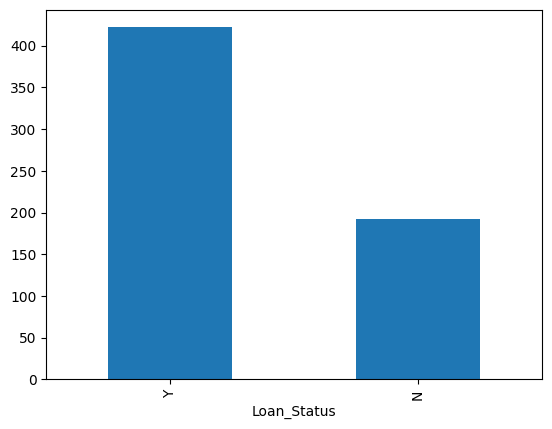

In [9]:
# plotting the bar plot of target variable
train['Loan_Status'].value_counts().plot.bar();

The loan of 422(around 69%) people out of 614 was approved. 

## Independent Variable (Categorical)
Now we will try to find out the relationship between categorical variables and Loan_Status. We will do this using two-way frequency tables or cross-tabulation between two variables. It can be done using the following code:

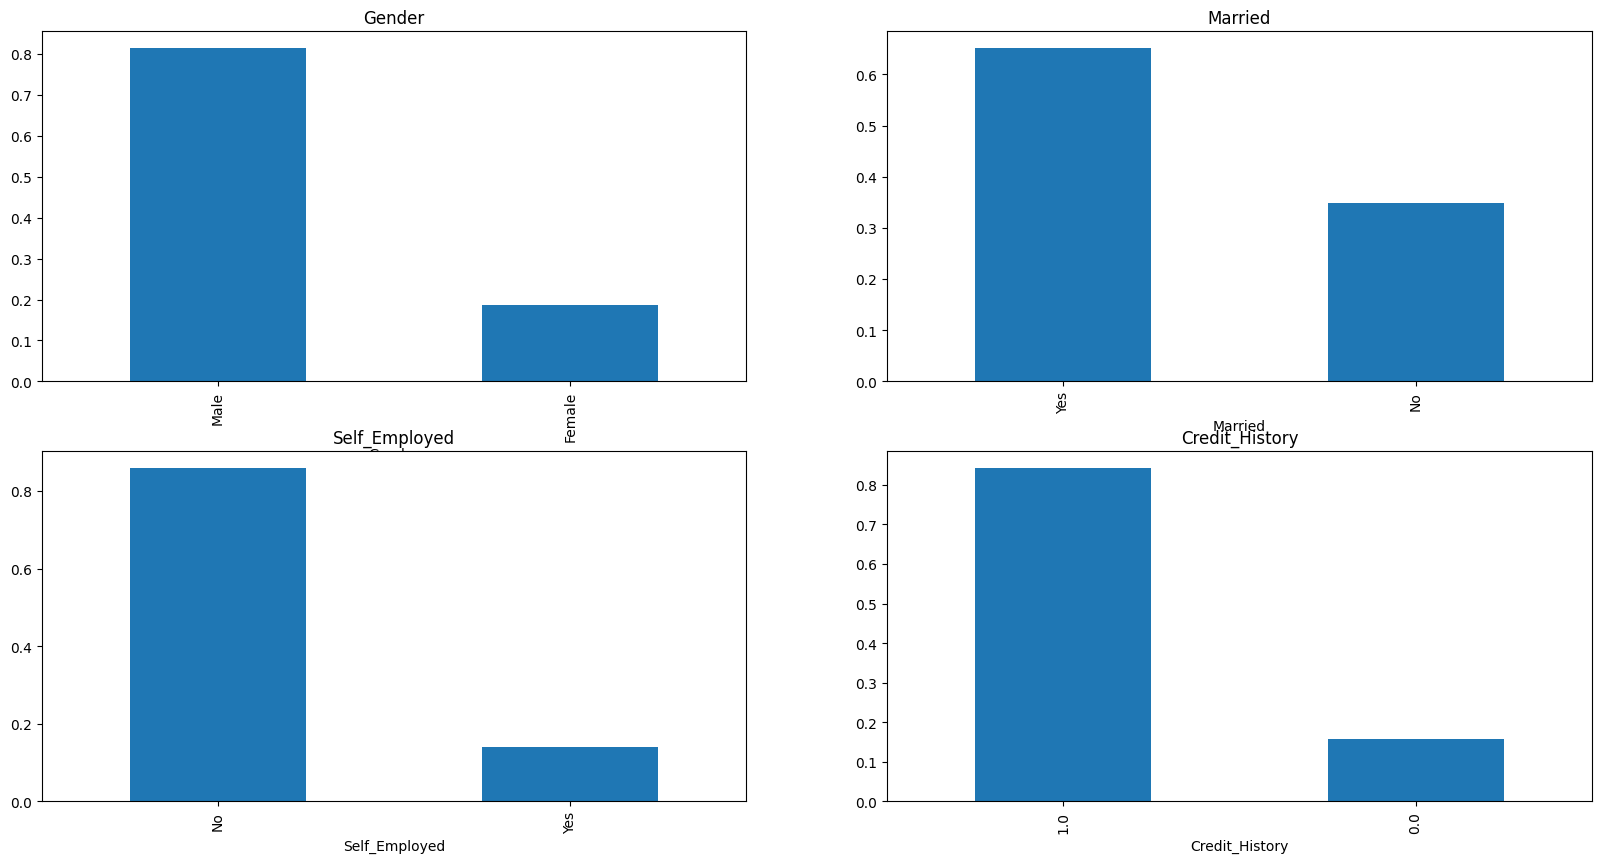

In [10]:
# plotting the independent categorical variables
plt.figure(1), plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),
title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

from the above bar plots we can see that:
* 80% of applicants in the dataset are male
* Around 65% of the applicants in the dataset are married.
* Around 15% of applicants in the dataset are self-employed.
* Around 85% of applicants have repaid their debts.

## Independent Variable (Ordinal)
Ordinal variables are similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values.



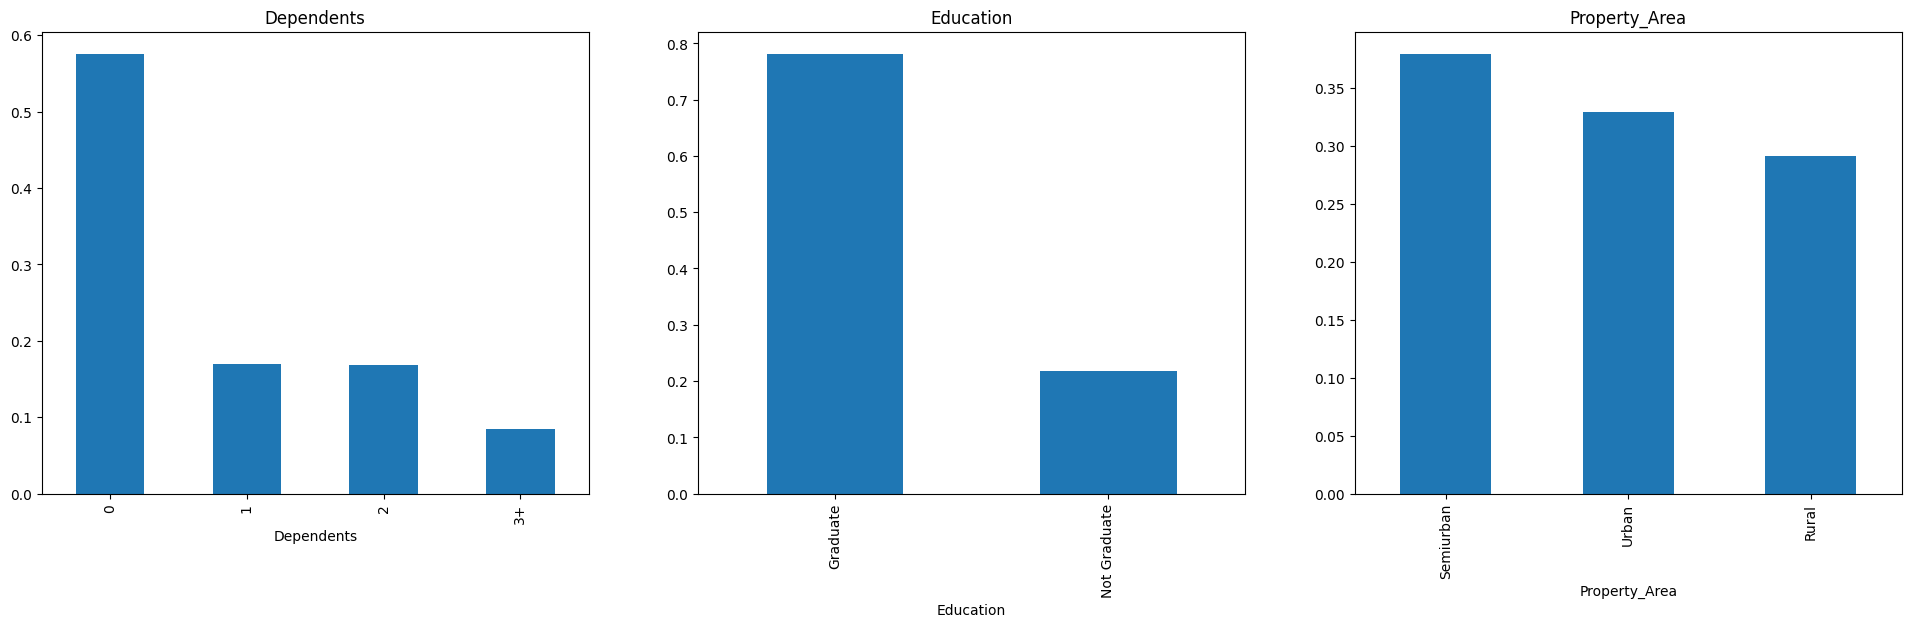

In [11]:
# plotting the independent ordinal variables
plt.figure(1), plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),
title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

From the above bar plots we can infer that:
* Most of the applicants dont have any dependents.
* Around 80% of the applicants are Graduate.
* Most of the applicants are from Semiurban area.


## Independent Variable (Numerical)
Lets look at the distribution of LoanAmount first. As it is a numerical variable, we can use histogram to visualize the distribution. In the below histogram, we see that there are few extreme values. Clearly, this is because we are looking at people with different education levels. So we can expect the distribution to be normal.

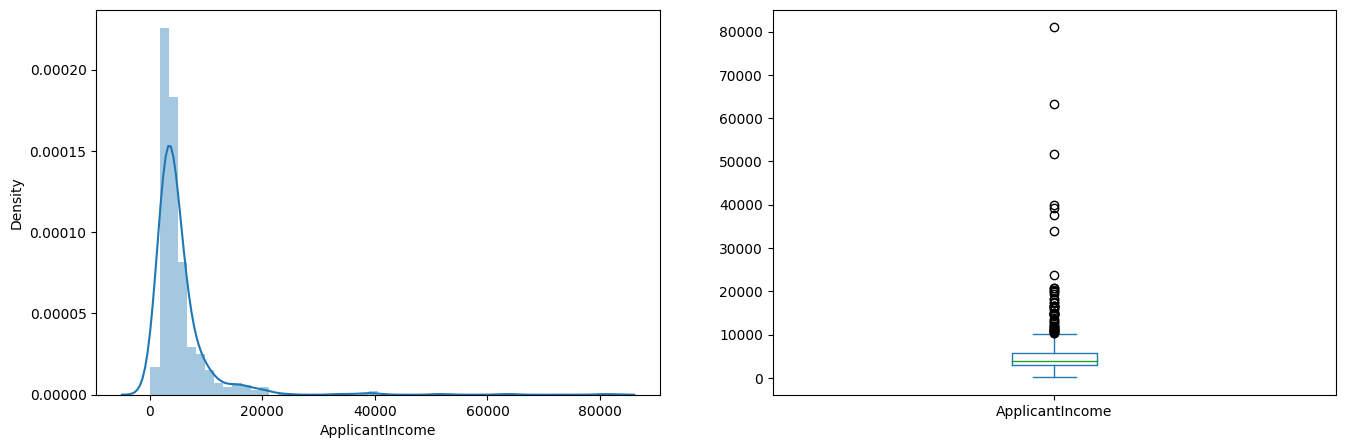

In [12]:
# plotting the independent numerical variables
plt.figure(1), plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

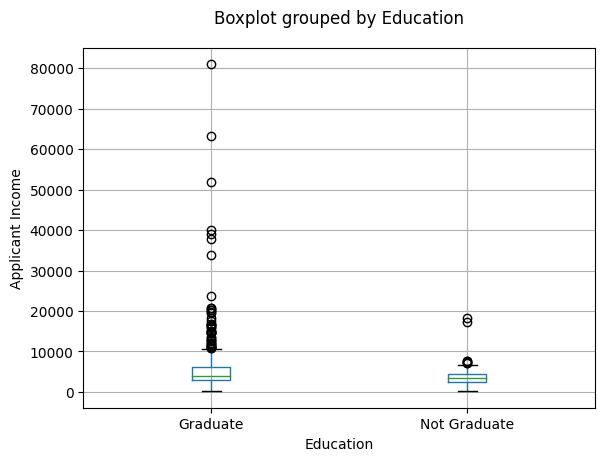

In [13]:
# plotting the coapplicant income by education
ax = train.boxplot(column='ApplicantIncome', by='Education')
ax.set_title("")
ax.set_ylabel('Applicant Income');


we can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

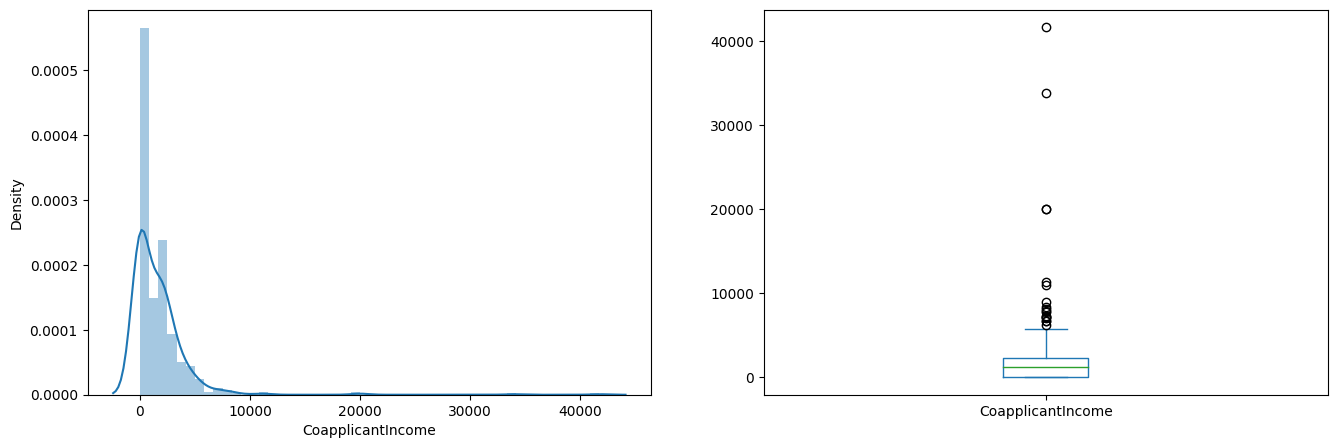

In [14]:
# plotting the coapplicant income distribution
plt.figure(1), plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

we can see that majority of coapplicants income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

Let us look at the distribution of LoanAmount variable.

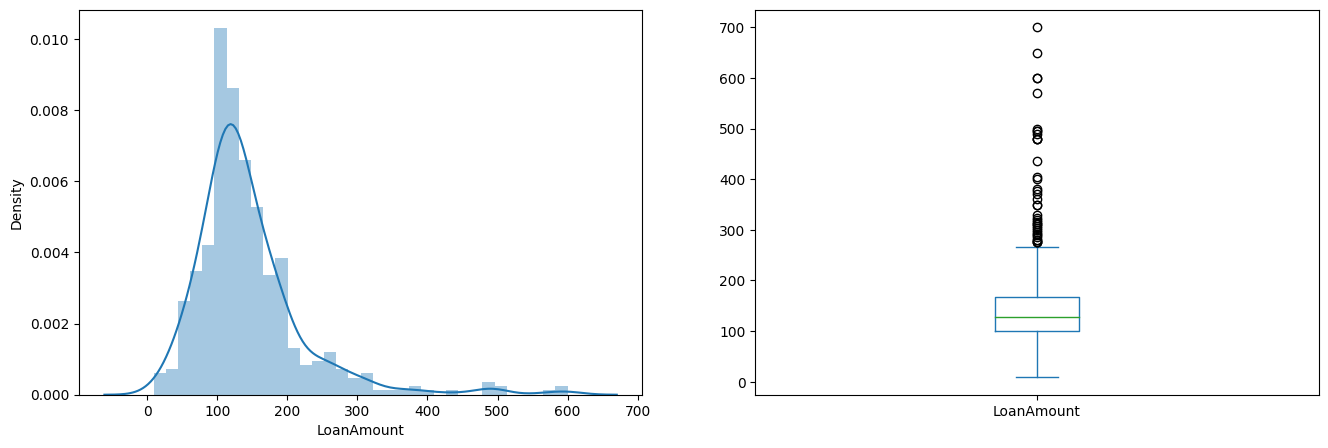

In [15]:
# plotting the loan amount distribution
plt.figure(1), plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

we can see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

## Bivariate Analysis
After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable in bivariate analysis. We can use bivariate analysis to test the hypotheses that we generated earlier. Some of the hypotheses are: 

* Applicants with high income should have more chances of loan approval.
* Applicants who have repaid their previous debts should have higher chances of loan approval.
* Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
* Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

Let’s try to test the above mentioned hypotheses using bivariate analysis

## Categorical Independent Variable vs Target Variable
First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

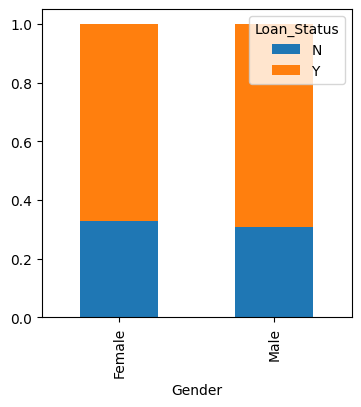

In [16]:
# plotting the loan amount term distribution
Gender= pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', 
                                                     stacked=True, figsize=(4,4));



it can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.

Now let us visualize the remaining categorical variables vs target variable.

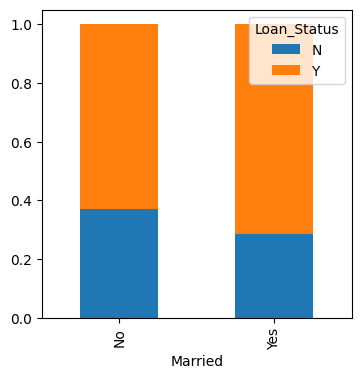

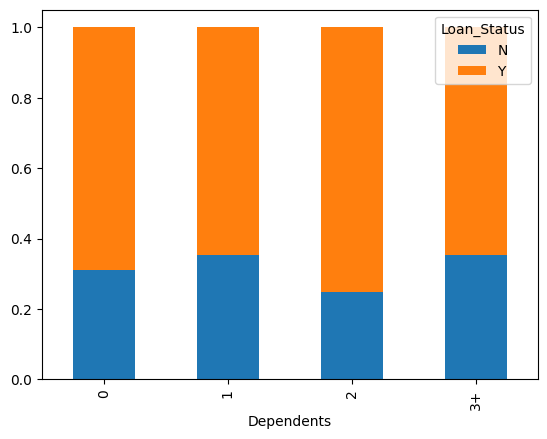

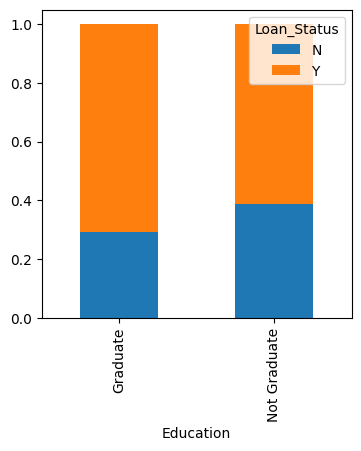

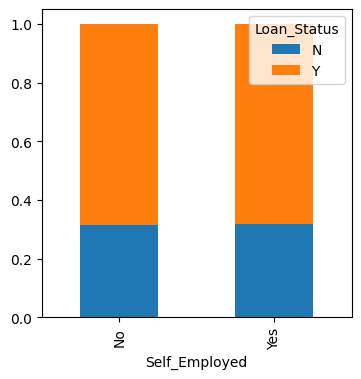

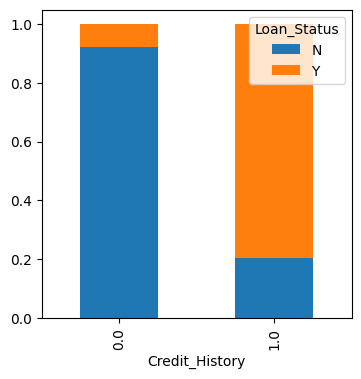

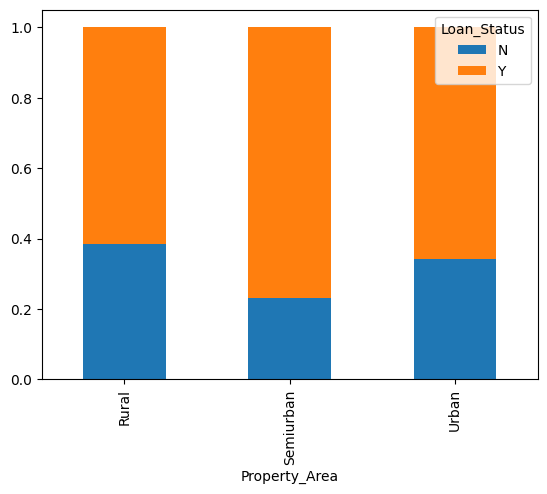

In [17]:
# plotting the remaining categorical vs target variable
Married= pd.crosstab(train['Married'],train['Loan_Status'])
Dependents= pd.crosstab(train['Dependents'],train['Loan_Status'])
Education= pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed= pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Credit_History= pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area= pd.crosstab(train['Property_Area'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',
stacked=True, figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',
stacked=True)
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar',
stacked=True, figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar',
stacked=True, figsize=(4,4))
plt.show()
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',
stacked=True, figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',
stacked=True)
plt.show()




* Proportion of married applicants is higher for the approved loans.
* Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
* It seems people with credit history as 1 are more likely to get their loans approved.
* Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

## Numerical Independent Variable vs Target Variable
We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

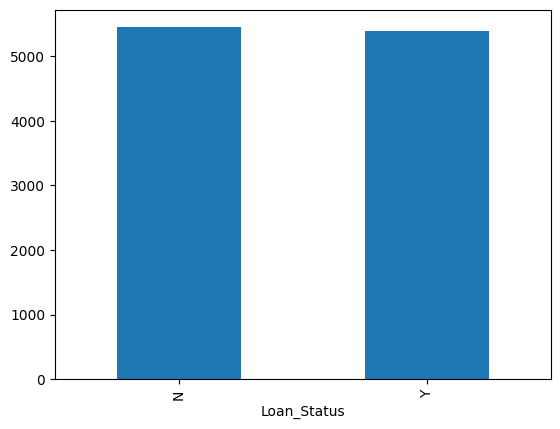

In [18]:
# plotting the numerical independent variables vs target variable
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar();

Here the y axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

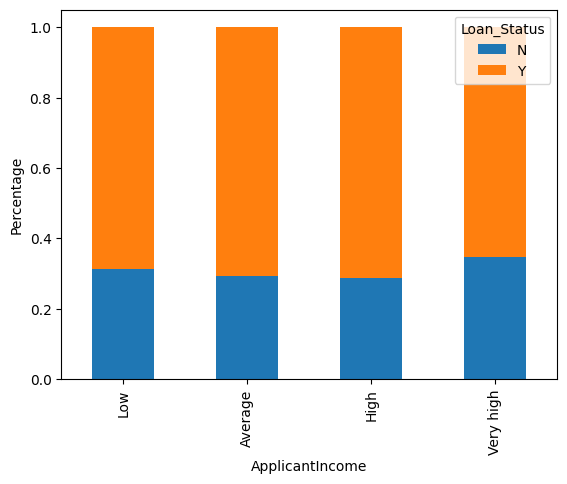

In [19]:
# making bins for applicant income variable
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)
# plotting the bins
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the coapplicant income and loan amount variable in similar manner.

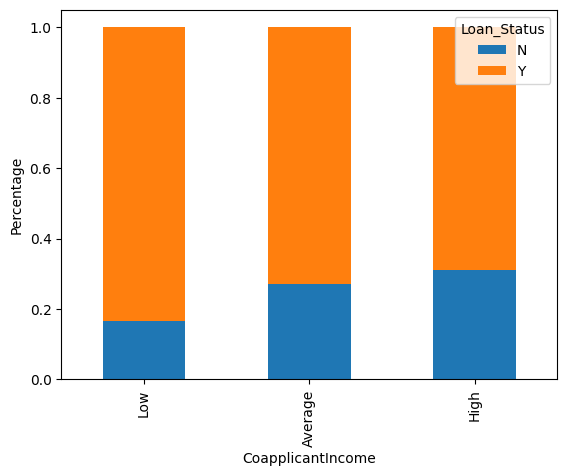

In [20]:
# making bins for coapplicant income variable
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)
# plotting the bins
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')
plt.show()

It shows that if a coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

Let combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

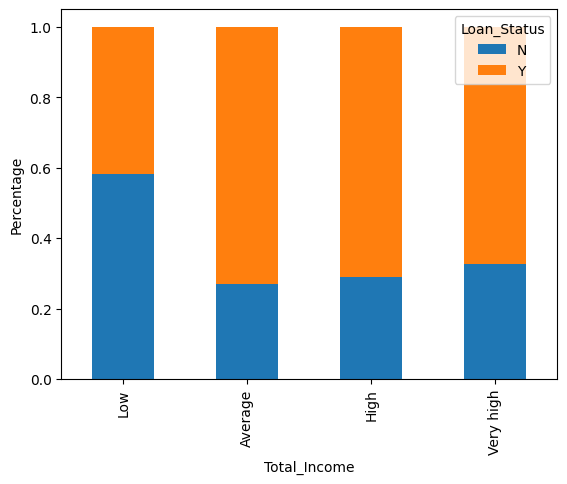

In [21]:
# making a new column for total income
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
# making bins for total income variable
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
# plotting the bins
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')
plt.show()


We can see that the proportion of loans getting approved for applicants having low Total Income is very less as compared to that of applicants with Average, High and Very High Income.

Let’s visualize the Loan amount variable.

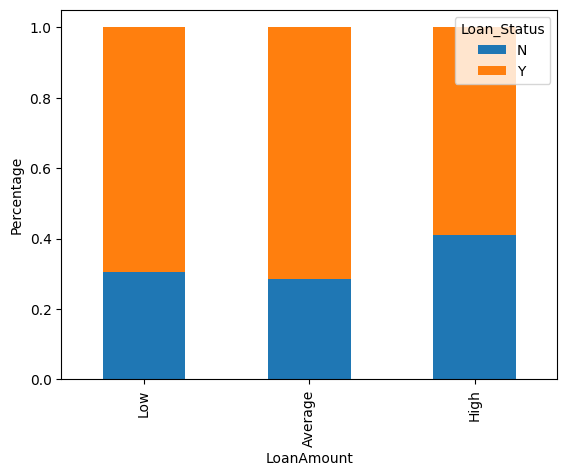

In [22]:
# making bins for loan amount variable
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
# plotting the bins
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar',
stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')
plt.show()

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Lets drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [23]:
# dropping the bins which we created for the exploration part
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

# replacing 3+ in dependents variable with 3
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)


Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

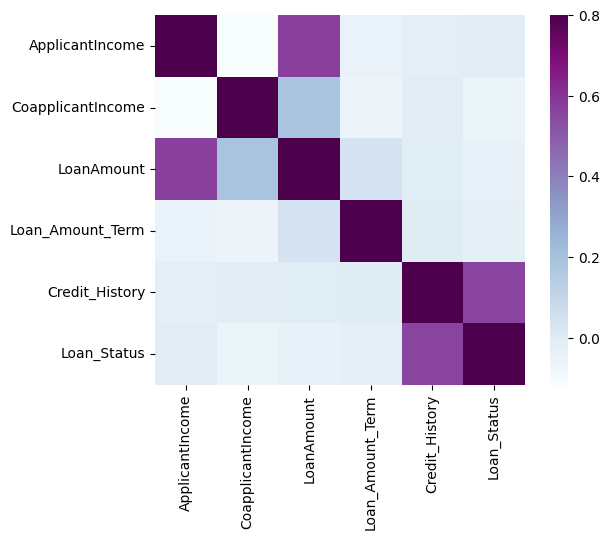

In [24]:

# finding the correlation between all the numerical variables
matrix = train.select_dtypes(include=[np.number]).corr()
# plot the heatmap
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

We can see most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

## Missing value imputation
let’s list out feature-wise count of missing values.

In [25]:
# finding the missing values in the train dataset
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

* For numerical variables: imputation using mean or median
* For categorical variables: imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features.

In [26]:
# filling the missing values in train dataset
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

Now lets find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [27]:
# checking the value counts of loan amount term variable
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

It can be seen that the value 360 has highest frequency. So we will replace the missing values in this variable using the mode of this variable.

In [28]:
# filling the missing values in train dataset
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we see loan amount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [29]:
# filling the missing values in train dataset
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

Now lets check to see if all the missing values are filled in the dataset.

In [30]:
# checking the missing values in train dataset
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see all the missing values have been filled in the train dataset. Let’s fill all the missing values in the test dataset too with the same approach.

In [31]:
# filling the missing values in test dataset
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

## Outlier Treatment
As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. Having outliers in the dataset usually leads to a lower accuracy in training models. There are many ways to treat outliers. We can treat them as:

* Removing outliers: Outliers can be removed from the dataset statistically by calculating the z-score of every value in the dataset and removing the values which are more than 3 standard deviation away from the mean.
* Log transformation: We can transform the data by taking a log of the values. This will not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.
* Treating outliers with mean / median: We can also try to change the outliers values with the mean or median values. However, we should only implement this method if we are sure that outliers are due to some error or false data entry. Otherwise, it is not advisable to use this method as it reduces the effect of outliers by replacing them with mean or median, which in turn affects the overall distribution of the variable.

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.

<Axes: >

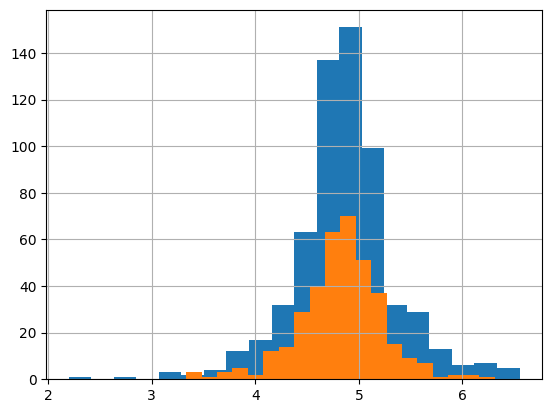

In [32]:
# log transformation of loan amount variable to remove the skewness
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20)


Now look at the histogram and boxplot of LoanAmount. We can see that, now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

## Model Building : Part I
Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome. 

## Logistic Regression
logistic regression is a classificaton algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables. To represent binary / categorical outcome, we use dummy variables.
It is an estimation of log odds. Log odds is the ratio of the probability of event occurring to the probability of event not occurring.
The estimation of Logit function creates a s-shaped curve with probability estimate, which is very similar to the required step wise function

Lets drop the loan id variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [33]:
# dropping the loan id variable as it is not required
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

Let drop the target variable from the train dataset and save it in another dataset.

In [34]:
# dropping the target variable from train dataset and saving it in another dataset
X = train.drop(['Loan_Status'], axis=1)
y=train.Loan_Status

### dummy variables
We will replace the 0 and 1 of target variable with N and Y respectively.



In [35]:
# creating dummy variables for the categorical variables
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)


In [36]:
# splitting the train dataset into train and validation dataset
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

In [37]:
# importing the logistic regression and accuracy score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# making the instance of the model
model = LogisticRegression()

# fitting the model with the training dataset
model.fit(x_train, y_train)

# predicting the target variable for validation dataset
pred_cv = model.predict(x_cv)

# calculating the accuracy score
print(accuracy_score(y_cv,pred_cv))

# predicting the target variable for test dataset
pred_test = model.predict(test)

# reading the sample submission
submission=pd.read_csv(r'C:\Users\admin\Desktop\my projects\loan\sample_submission_49d68Cx.csv')

# filling the loan id and loan status columns
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

# converting the submission file to csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

0.7891891891891892


An accuracy of 0.79 indicates that 79% of the time the model is able to predict the loan status correctly.

## Logistic Regression using stratified k-folds cross validation

Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole. For example in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances. It is generally a better approach when dealing with both bias and variance.

Let’s import StratifiedKFold from sklearn and fit the model.

In [38]:
# importing stratified k fold
from sklearn.model_selection import StratifiedKFold

# making the cross validation function
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

# creating two empty lists
train_accuracy = []
validation_accuracy = []

# splitting the train dataset into train and validation dataset

for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    
    # making the instance of the model
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    
    # predicting the target variable for validation dataset
    pred_test = model.predict(xvl)
    
    # calculating the accuracy score for validation dataset
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    
    # appending the scores in the empty lists
    train_accuracy.append(accuracy_score(ytr,model.predict(xtr)))
    validation_accuracy.append(score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


# calculating the mean of the validation accuracy
print('\n\n')
print('mean validation accuracy score',np.mean(validation_accuracy))
print('mean train accuracy score',np.mean(train_accuracy))

# making the instance of the model



1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147



mean validation accuracy score 0.8012928162068507
mean train accuracy score 0.8090391270511483


The mean accuracy for the model is 0.81 with a standard deviation of 0.03. Let us visualize the roc curve.

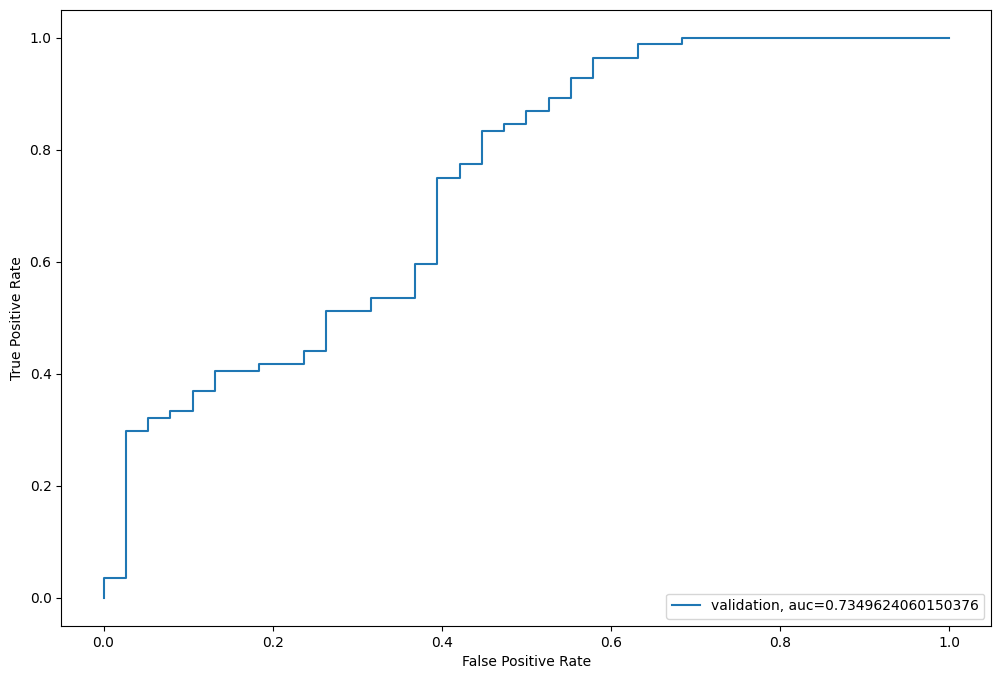

In [39]:
# Visualizing the roc curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

We see an auc score of 0.73.

In [40]:
# submitting the file
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

# converting the submission file to csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

## Feature Engineering
Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

* Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.
* EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
* Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

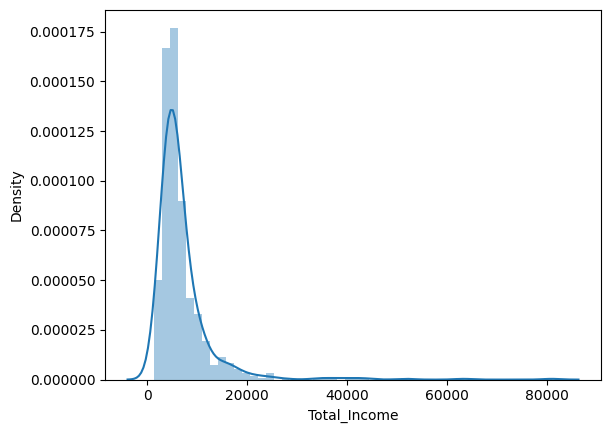

In [41]:
# making the total income variable
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

# plotting the distribution of total income
sns.distplot(train['Total_Income']);

We can see that it is skewed towards the right and there are some extreme values. So we can apply log transformation to make the distribution normal.

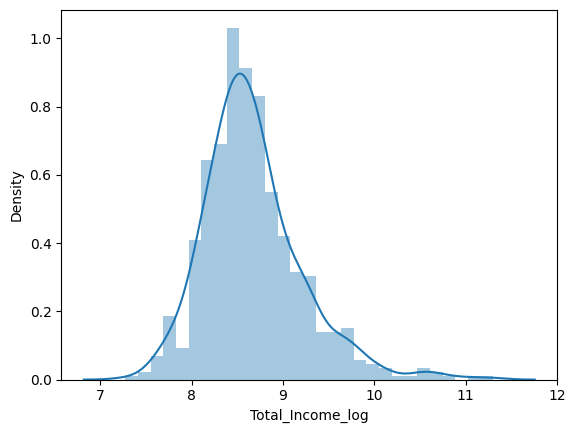

In [42]:
# taking the log transformation of total income
train['Total_Income_log'] = np.log(train['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])
sns.distplot(train['Total_Income_log']);

We can see that the distribution is much better than before.

Let’s create the EMI feature now.

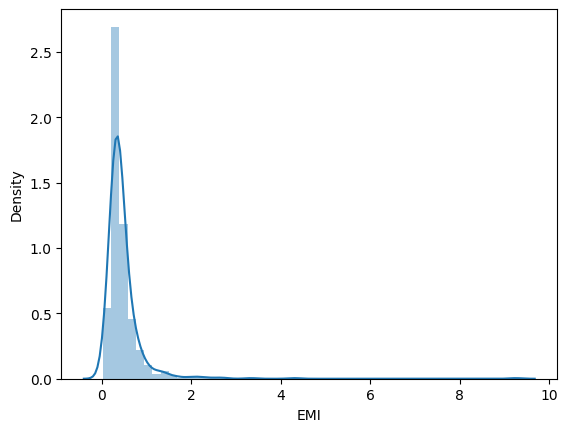

In [43]:
# creating the emi variable
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

# plotting the distribution of emi variable
sns.distplot(train['EMI']);

Let create Balance Income feature now and check its distribution.

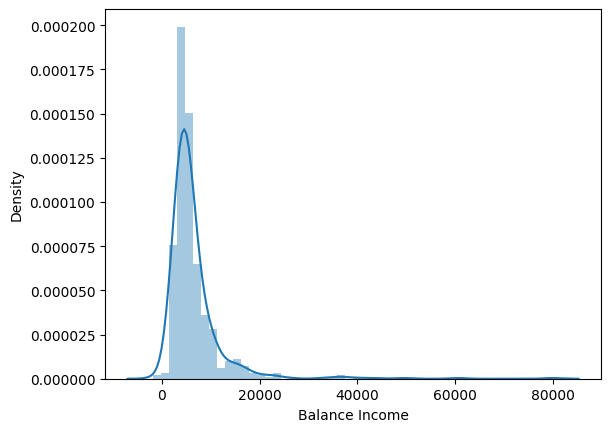

In [44]:
# creating the balance income variable
train['Balance Income']=train['Total_Income']-(train['EMI']*1000)
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

# plotting the distribution of balance income variable
sns.distplot(train['Balance Income']);

Lets drop the used variables which we used to create these new features. We will drop the variables after creating the new features because the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We will do the same changes to the test dataset which we did for the training dataset.

In [45]:
# dropping the variables which we used to create these new features
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)


## Model Building : Part II
After creating new features, we can continue the model building process. So lets start with the logistic regression model and then we will also try decision tree algorithm.

## Logistic Regression

In [46]:
# X and y variables for building the model
X = train.drop('Loan_Status',axis=1)
y = train.Loan_Status

In [48]:
# Logistic Regression
# Initialize lists to store accuracy scores
train_accuracy = []
validation_accuracy = []

# Initialize the counter for k-fold iterations
i = 1

# Create StratifiedKFold object
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# Iterate through each fold
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    
    # Split the data into training and validation sets
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    # Initialize the logistic regression model
    model = LogisticRegression(random_state=1)
    
    # Fit the model on the training data
    model.fit(xtr, ytr)
    
    # Predict the target variable for the validation dataset
    pred_test = model.predict(xvl)
    
    # Calculate and print the accuracy score for the validation dataset
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    
    # Append the scores to the respective lists
    train_accuracy.append(accuracy_score(ytr, model.predict(xtr)))
    validation_accuracy.append(score)
    
    i += 1

    # Predict on the test dataset (if you intend to use the model for predictions)
    pred_test = model.predict(test)
    
# Optionally, you can calculate and print the mean validation accuracy
mean_validation_accuracy = sum(validation_accuracy) / len(validation_accuracy)
print('\nMean Validation Accuracy:', mean_validation_accuracy)
print('mean train accuracy score',np.mean(train_accuracy))



1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.680327868852459

Mean Validation Accuracy: 0.7214314274290283
mean train accuracy score 0.7312892222608581


The feature engineering didnt improve the model performance. 

In [49]:
# creating submission file
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

# converting submission file to csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv')


## Decision Tree
Decision tree is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables. In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter / differentiator in input variables.

Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that the purity of the node increases with respect to the target variable. Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

In [53]:
# importing the decision tree classifier
from sklearn import tree
# lists to store accuracy scores
train_accuracydf = []
validation_accuracydf = []

# decision tree with 5 folds cross validation
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    # making the instance of the model
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    
    # predicting the target variable for validation dataset
    pred_test = model.predict(xvl)
    
    # calculating the accuracy score
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)

    # appending the scores in the empty lists
    train_accuracydf.append(accuracy_score(ytr,model.predict(xtr)))
    validation_accuracydf.append(score)

    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


# calculating the mean of the validation accuracy
print('\n\n')
print('mean validation accuracy score',np.mean(validation_accuracydf))
print('mean train accuracy score',np.mean(train_accuracydf))



1 of kfold 5
accuracy_score 0.7398373983739838

2 of kfold 5
accuracy_score 0.6991869918699187

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7073170731707317

5 of kfold 5
accuracy_score 0.6721311475409836



mean validation accuracy score 0.7149140343862455
mean train accuracy score 1.0


The accuracy score we got for the decision tree model is 0.72 which is the same as the accuracy score of logistic regression model.

## Random Forest

RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.

For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.

In [55]:
# importing the random forest classifier
from sklearn.ensemble import RandomForestClassifier

# lists to store accuracy scores
train_accuracyrf = []
validation_accuracyrf = []
# random forest with 5 folds cross validation
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    # making the instance of the model
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr, ytr)
    
    # predicting the target variable for validation dataset
    pred_test = model.predict(xvl)
    
    # calculating the accuracy score
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)

    # appending the scores in the empty lists
    train_accuracyrf.append(accuracy_score(ytr,model.predict(xtr)))
    validation_accuracyrf.append(score)

    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


# calculating the mean of the validation accuracy
print('\n\n')
print('mean validation accuracy score',np.mean(validation_accuracyrf))
print('mean train accuracy score',np.mean(train_accuracyrf))


1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.7723577235772358

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7540983606557377



mean validation accuracy score 0.7947221111555378
mean train accuracy score 0.9405535409732917


In [59]:
# creating submission file
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

# converting submission file to csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random Forest.csv')

The mean validation accuracy score for the model is 0.79. We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters. Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.

## GridSearchCV
we will tune the max_depth and n_estimators parameters. Max depth indicates the depth of the tree and n_estimator indicates the number of trees in the forest. 

In [56]:
# importing grid search
from sklearn.model_selection import GridSearchCV

# defining the parameter range
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}

# making the instance of the model
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

# splitting the train dataset into train and validation dataset
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3, random_state=1)

# fitting the model with the training dataset
grid_search.fit(x_train,y_train)

# finding the optimal accuracy score and hyperparameters
grid_search.best_estimator_



RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)

In [57]:
# building the model with best parameters

# lists to store accuracy scores
train_accuracyrf2 = []
validation_accuracyrf2 = []

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    # making the instance of the model
    model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=41)
    model.fit(xtr, ytr)
    
    # predicting the target variable for validation dataset
    pred_test = model.predict(xvl)
    
    # calculating the accuracy score
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)

    # appending the scores in the empty lists
    train_accuracyrf2.append(accuracy_score(ytr,model.predict(xtr)))
    validation_accuracyrf2.append(score)

    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]

# calculating the mean of the validation accuracy
print('\n\n')
print('mean validation accuracy score',np.mean(validation_accuracyrf2))
print('mean train accuracy score',np.mean(train_accuracyrf2))



1 of kfold 5
accuracy_score 0.8211382113821138

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7868852459016393



mean validation accuracy score 0.8012794882047182
mean train accuracy score 0.8387561472356069


The mean accuracy for the model after hyperparameter tuning is 0.81. So the accuracy has not improved much after tuning the parameters.

In [58]:
# creating submission file
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

# converting submission file to csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random Forest2.csv')

Feature importance is another way of feature selection. It gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable. Feature importance is an inbuilt class that comes with Tree Based Classifiers.

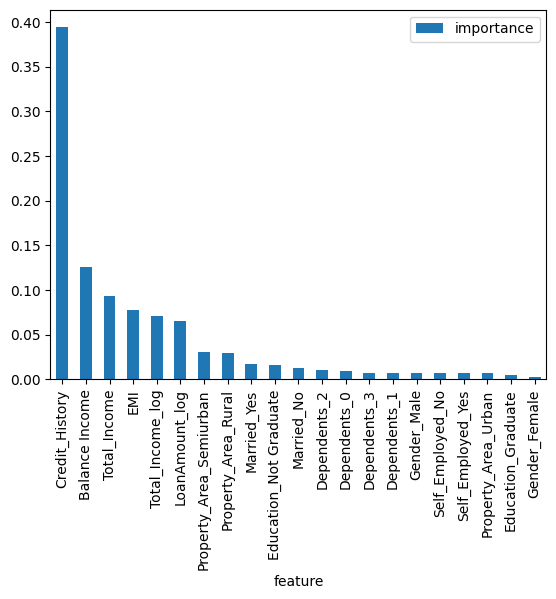

In [60]:
# creating a dataframe with the features and their respective importance
importance = pd.DataFrame({'feature': X.columns, 'importance': np.round(model.feature_importances_,3)})
importance = importance.sort_values('importance', ascending=False).set_index('feature')
importance.head(15)

# plotting the feature importance
importance.plot.bar();

We can see that the most important feature is Credit_History followed by balance income, Total Income, EMI, and Loan Amount. so, feature engineering helped us in predicting our target variable.

## XGBoost
XGBoost is a fast and efficient algorithm and has been used to by the winners of many data science competitions. It’s a boosting algorithm.

Xgboost works only with numeric variables and we have already replaced the categorical variables with numeric variables in the feature engineering section.

In [61]:
# importing the xgboost classifier
from xgboost import XGBClassifier

# lists to store accuracy scores
train_accuracyxg = []
validation_accuracyxg = []

# xgboost with 5 folds cross validation
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    # making the instance of the model
    model = XGBClassifier(n_estimators=50, max_depth=4)
    model.fit(xtr, ytr)
    
    # predicting the target variable for validation dataset
    pred_test = model.predict(xvl)
    
    # calculating the accuracy score
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)

    # appending the scores in the empty lists
    train_accuracyxg.append(accuracy_score(ytr,model.predict(xtr)))
    validation_accuracyxg.append(score)

    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]

# calculating the mean of the validation accuracy
print('\n\n')
print('mean validation accuracy score',np.mean(validation_accuracyxg))
print('mean train accuracy score',np.mean(train_accuracyxg))


1 of kfold 5
accuracy_score 0.7804878048780488

2 of kfold 5
accuracy_score 0.7886178861788617

3 of kfold 5
accuracy_score 0.7642276422764228

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7622950819672131



mean validation accuracy score 0.7752232440357191
mean train accuracy score 0.9474765287367741


In [62]:
# creating submission file
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

# converting submission file to csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv')

In [63]:
# hyperparameter tuning for xgboost
# defining the parameter range
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
# making the instance of the model
grid_search=GridSearchCV(XGBClassifier(random_state=1),paramgrid)


# fitting the model with the training dataset
grid_search.fit(x_train,y_train)

# finding the optimal accuracy score and hyperparameters
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)